# clustering:
1_hierarchical:(agglomerative(bown_up) , divisive(up_down))
2_flat:(centroid based methods ,distribution based clustering , density based clustering)


# clustering(flat:centroid(k_means)

In [1]:
#import relative libreries
import pandas as pd
import numpy as nu
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("D:\\tala\\data science projects\\dr.fozouni\\Country Clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    6 non-null      object 
 1   Latitude   6 non-null      float64
 2   Longitude  6 non-null      float64
 3   Language   6 non-null      object 
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes


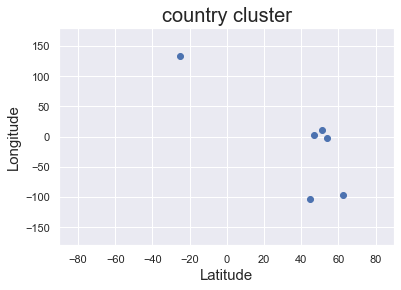

In [4]:
plt.scatter(data['Latitude'] , data["Longitude"])

plt.xlabel("Latitude" , size=15)
plt.ylabel("Longitude" , size=15)

plt.xlim(-90,90)
plt.ylim(-180,180)

plt.title("country cluster" , size=20)

plt.show()

# select features

In [5]:
x=data.iloc[:,1:3]
#x=data.drop(["Country" , "Language" , axis=1]
#x=data[["Latitude" , "Longitude"]]

In [6]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# clustering

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans=KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

clustering result

In [9]:
cluster_result=kmeans.fit_predict(x)
#fit_predict compute cluster centers and predict cluster index for each sample
cluster_result

array([0, 0, 2, 2, 2, 1])

check point

In [10]:
data_clustered=data.copy()

In [11]:
data_clustered["cluster_num"]=cluster_result
data_clustered

,Country,Latitude,Longitude,Language,cluster_num
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


# visualization

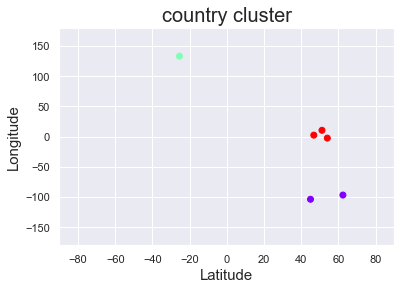

In [12]:
plt.scatter(data_clustered["Latitude"] ,data_clustered["Longitude"] , c=data_clustered["cluster_num"] , cmap="rainbow")

plt.xlabel("Latitude" , size=15)
plt.ylabel("Longitude" , size=15)

plt.xlim(-90,90)
plt.ylim(-180,180)

plt.title("country cluster" , size=20)

plt.show()

# wcss

In [13]:
wcss=[]
for i in range(1,5):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
pd.DataFrame(wcss ,columns=["wcss"])

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,wcss
0,42601.913567
1,13205.758120
2,288.105233
3,111.912333


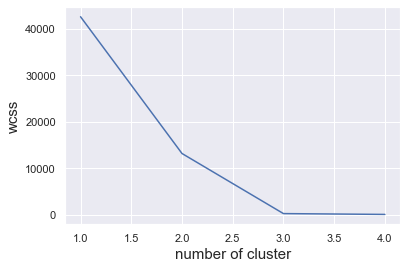

In [14]:
plt.plot(range(1,5) , wcss)

plt.xlabel("number of cluster" , size=15)
plt.ylabel("wcss" ,size=15)

plt.show()

# clustering with 3 features

In [15]:
new_x=data.iloc[: , 1:4]
new_x

,Latitude,Longitude,Language
0,44.97,-103.77,English
1,62.40,-96.80,English
2,46.75,2.40,French
3,54.01,-2.53,English
4,51.15,10.40,German
5,-25.45,133.11,English


In [16]:
new_x["Language"]=new_x["Language"].map({"English":0 , "French":1 , "German":2})
new_x                            

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [17]:
x_new=new_x.copy()

In [18]:
kmeans_new=KMeans(3)
kmeans_new.fit(new_x)

KMeans(n_clusters=3)

In [19]:
new_cluster_result=kmeans_new.fit_predict(new_x)
x_new["clusters"]=new_cluster_result
x_new

,Latitude,Longitude,Language,clusters
0,44.97,-103.77,0,1
1,62.40,-96.80,0,1
2,46.75,2.40,1,0
3,54.01,-2.53,0,0
4,51.15,10.40,2,0
5,-25.45,133.11,0,2


In [20]:
wcss_new=[]
for i in range(1,5):
    kmeans_new=KMeans(i)
    kmeans_new.fit(new_x)
    wcss_new.append(kmeans_new.inertia_)
    
pd.DataFrame(wcss_new ,columns=["wcss new"])

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,wcss new
0,42605.413567
1,13208.958120
2,290.105233
3,113.912333


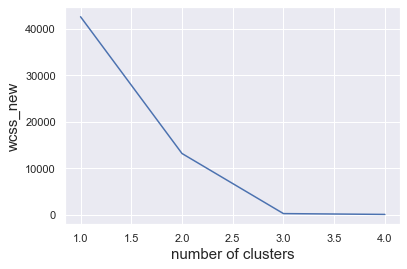

In [21]:
plt.plot(range(1,5) , wcss_new)

plt.xlabel("number of clusters" , size=15)
plt.ylabel("wcss_new" ,size=15)

plt.show()

# clustering (hierarchical)

# Dendogram

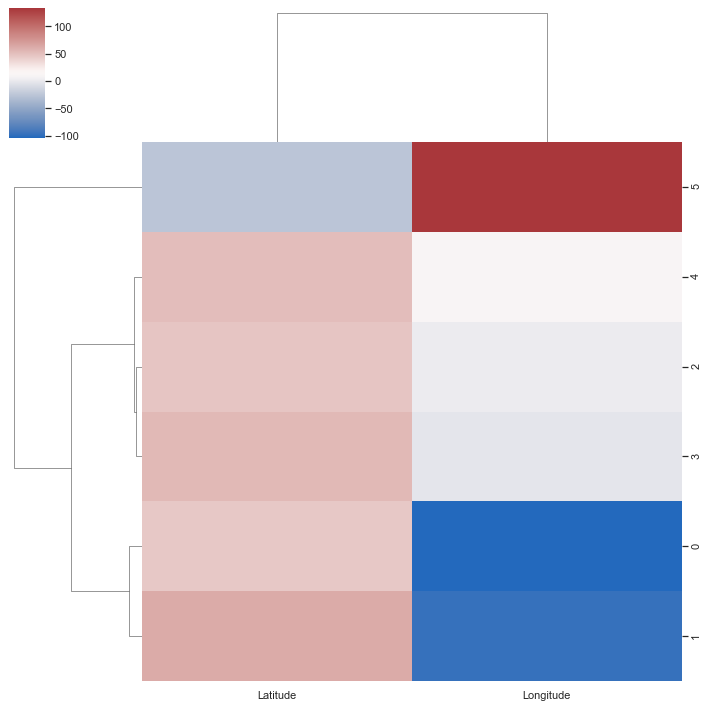

In [22]:
# with 2 features
sns.clustermap(x , cmap="vlag")

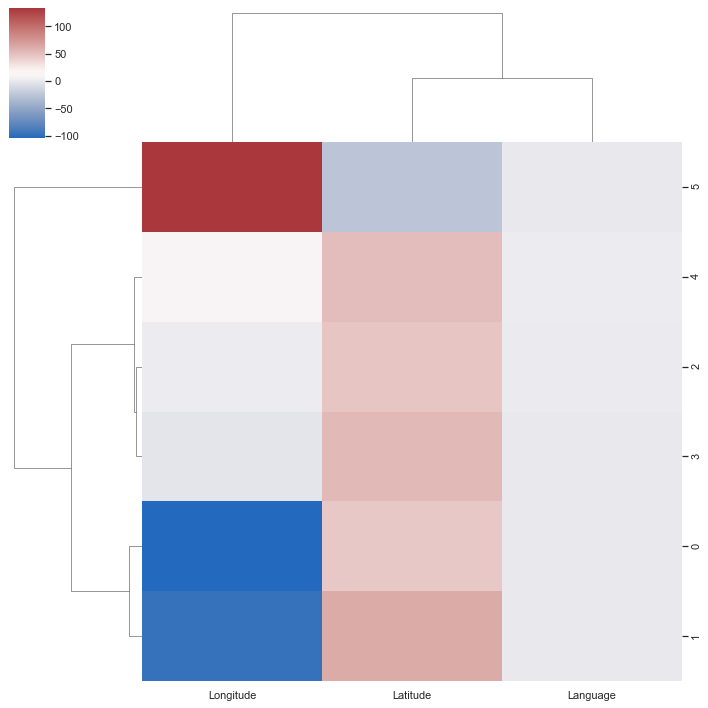

In [23]:
#with 3 fearures
sns.clustermap(new_x , cmap="vlag")